In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from scipy import stats
from scipy.stats import ttest_ind,chi2_contingency
from statsmodels.stats.proportion import proportions_ztest

In [3]:
with open("../data/processed/01_data_processed.pkl", "rb") as file:
    df = pickle.load(file)
    
df.head(5)

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,1,400000,6,1,0,0,0
1,31,Private Sector,1,1250000,7,0,0,0,0
2,34,Private Sector,1,500000,4,1,0,0,1
3,28,Private Sector,1,700000,3,1,0,0,0
4,28,Private Sector,1,700000,8,1,1,0,0


#### Hypothesis 1:
Are self-employed individuals more likely to have higher incomes compared to those in the private sector?



Null Hypothesis (H0): There is no significant difference in the average annual income between self-employed individuals and those in the private sector. In mathematical terms:

H0: μ_self_employed = μ_private_sector

Where:

μ_self_employed is the population mean annual income of self-employed individuals.


μ_private_sector is the population mean annual income of individuals in the private sector.

<br>
Alternate Hypothesis (H1): Self-employed individuals have a significantly higher average annual income compared to those in the private sector. In mathematical terms:

H1: μ_self_employed > μ_private_sector

Where:

μ_self_employed is the population mean annual income of self-employed individuals.
μ_private_sector is the population mean annual income of individuals in the private sector.

In [4]:
# Collect data
non_governmentemployee = df[df['Employment Type'] == 'Private Sector']
governmentemployee = df[df['Employment Type'] == 'Government Sector']
income_nongovtemployee = non_governmentemployee['AnnualIncome']
income_govtemployee = governmentemployee['AnnualIncome']


print(f'Number of non government employees: {non_governmentemployee.shape[0]}')
print(f'Variance in annual income of non government employees: {np.var(income_nongovtemployee)}')
print(f'Number of government employees: {governmentemployee.shape[0]}')
print(f'Variance in annual income of government employees: {np.var(income_govtemployee )}')

Number of non government employees: 1417
Variance in annual income of non government employees: 123843188044.75778
Number of government employees: 570
Variance in annual income of government employees: 126633648815.01971


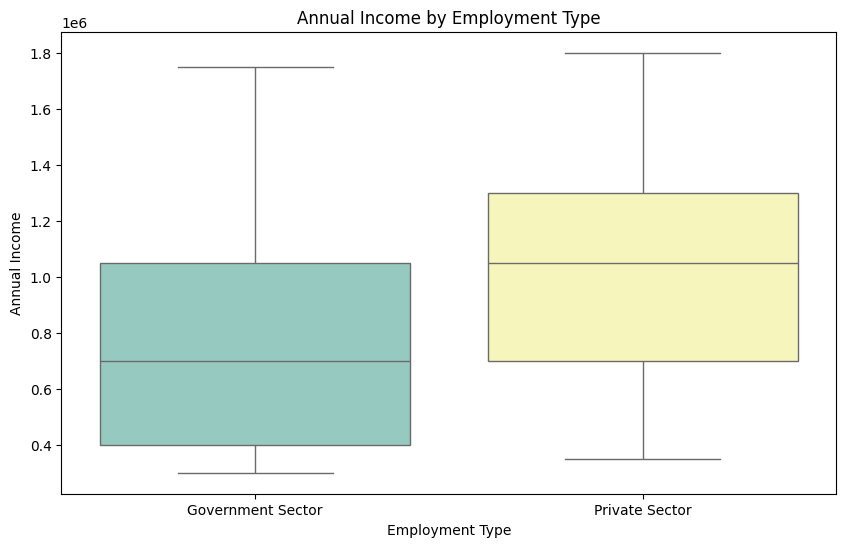

In [5]:
def visualize_income_by_employment(df, employment_column, income_column):
    # Visualize Annual Income by Employment Type
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x=employment_column, y=income_column, hue=employment_column, palette="Set3", legend=False)
    plt.title('Annual Income by Employment Type')
    plt.xlabel('Employment Type')
    plt.ylabel('Annual Income')
    plt.show()


visualize_income_by_employment(df, 'Employment Type', 'AnnualIncome')

In [6]:
t_statistic, p_value = ttest_ind(income_govtemployee, income_nongovtemployee, equal_var=False)
print(f't_statistic: {t_statistic}\np_value: {p_value}')
print ("\ntwo-sample t-test p-value=", p_value)

alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis: Private Sector individuals have a significantly higher average annual income compared to those not in the private sector")
else:
    print("Fail to reject the null hypothesis: Private Sector individuals do not have a significantly higher average annual income compared to those not in the private sector")

t_statistic: -16.51851412859321
p_value: 1.3145273978776467e-54

two-sample t-test p-value= 1.3145273978776467e-54
Reject the null hypothesis: Private Sector individuals have a significantly higher average annual income compared to those not in the private sector


#### Hypothesis 2:
 Does the number of family members influence the decision to purchase travel insurance?



Null Hypothesis (H0): The average proportion of individuals who purchase travel insurance is the same across all different family sizes.

H0: μ_1 = μ_2 = μ_3 = ... = μ_k

Where:

μ_1 is the population proportion of individuals who purchase travel insurance in the first family size category.


μ_2 is the population proportion of individuals who purchase travel insurance in the second family size category.

μ_3 is the population proportion of individuals who purchase travel insurance in the third family size category.


... (and so on for each family size category).

<br>
Alternate Hypothesis (H1): The average proportion of individuals who purchase travel insurance is not the same across all different family sizes.

H1: At least one of the population proportions μ_i (where i represents each family size category) is different from the others.

Number of insured individuals: 710
Variance in the number of family members for insured individuals: 2.8127375520729947
Number of uninsured individuals: 1277
Variance in the number of family members for uninsured individuals: 2.439913682776212


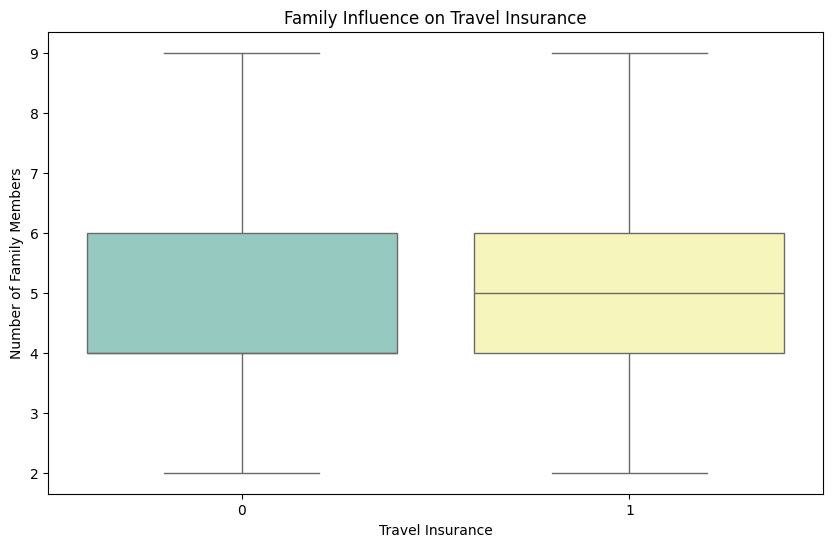

t_statistic: 3.499665212291613
p_value: 0.000480675938052489
Two-sample t-test p-value = 0.000480675938052489
Reject the null hypothesis: There is an association between number of family members and travel insurance.


In [7]:
# Collect data
insured_family = df[df['TravelInsurance'] == 1]
uninsured_family = df[df['TravelInsurance'] == 0]
family_insured = insured_family['FamilyMembers']
family_uninsured = uninsured_family['FamilyMembers']

print(f'Number of insured individuals: {insured_family.shape[0]}')
print(f'Variance in the number of family members for insured individuals: {np.var(family_insured)}')
print(f'Number of uninsured individuals: {uninsured_family.shape[0]}')
print(f'Variance in the number of family members for uninsured individuals: {np.var(family_uninsured)}')

def visualize_family_influence(df, insurance_column, family_column):
    
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x=insurance_column, y=family_column, hue=insurance_column, palette="Set3", legend=False)
    plt.title('Family Influence on Travel Insurance')
    plt.xlabel('Travel Insurance')
    plt.ylabel('Number of Family Members')
    plt.show()


visualize_family_influence(df, 'TravelInsurance', 'FamilyMembers')

t_statistic, p_value = ttest_ind(family_insured, family_uninsured, equal_var=False)
print(f't_statistic: {t_statistic}\np_value: {p_value}')
print("Two-sample t-test p-value =", p_value)

alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is an association between number of family members and travel insurance.")
else:
    print("Fail to reject the null hypothesis: There is no association between number of family members and travel insurance")

#### Hypothesis 3
Are individuals with chronic diseases more inclined to buy travel insurance?



Null Hypothesis (H0): The proportion of individuals with chronic diseases who purchase travel insurance is the same as the proportion of individuals without chronic diseases who purchase travel insurance.

H0: P(ChronicDiseases = 1 | TravelInsurance = 1) = P(ChronicDiseases = 0 | TravelInsurance = 1)

Where:

P(ChronicDiseases = 1 | TravelInsurance = 1) is the proportion of individuals with chronic diseases who purchase travel insurance.


P(ChronicDiseases = 0 | TravelInsurance = 1) is the proportion of individuals without chronic diseases who purchase travel insurance.

<br>
Alternate Hypothesis (H1): The proportion of individuals with chronic diseases who purchase travel insurance is different from the proportion of 
individuals without chronic diseases who purchase travel insurance.

H1: P(ChronicDiseases = 1 | TravelInsurance = 1) ≠ P(ChronicDiseases = 0 | TravelInsurance = 1)

In [11]:
# Collect data
chronic_insured = df[(df['TravelInsurance'] == 1) & (df['ChronicDiseases'] == 1)]
chronic_uninsured = df[(df['TravelInsurance'] == 0) & (df['ChronicDiseases'] == 1)]
nochronic_insured = df[(df['TravelInsurance'] == 1) & (df['ChronicDiseases'] == 0)]
nochronic_uninsured = df[(df['TravelInsurance'] == 0) & (df['ChronicDiseases'] == 0)]

print(f'Number of insured individuals with chronic diseases: {chronic_insured.shape[0]}')
print(f'Number of uninsured individuals with chronic diseases: {chronic_uninsured.shape[0]}')
print(f'Number of insured individuals without chronic diseases: {nochronic_insured.shape[0]}')
print(f'Number of uninsured individuals without chronic diseases: {nochronic_uninsured.shape[0]}')


# Chi-Squared Test for Independence
contingency_table = pd.crosstab(df['ChronicDiseases'], df['TravelInsurance'])
chi2, p, _, _ = chi2_contingency(contingency_table)

print("\nChi-Squared Test Results:")
print("Chi-Squared Statistic:", chi2)
print("p-value:", p)

alpha = 0.05  # Significance level
if p < alpha:
    print("Reject the null hypothesis: There is an association between chronic diseases and travel insurance.")
else:
    print("Fail to reject the null hypothesis: There is no association between chronic diseases and travel insurance.")

Number of insured individuals with chronic diseases: 205
Number of uninsured individuals with chronic diseases: 347
Number of insured individuals without chronic diseases: 505
Number of uninsured individuals without chronic diseases: 930

Chi-Squared Test Results:
Chi-Squared Statistic: 0.5754114650274649
p-value: 0.4481165216392011
Fail to reject the null hypothesis: There is no association between chronic diseases and travel insurance.


Variance was not calculated becaused it measures the spread or variability of values within a dataset. When you have a binary variable like "ChronicDiseases," its variance will be low because it doesn't exhibit variability; it's always one of two values. In this context, a variance of 0 is expected and indicates that there's no variation in the presence of chronic diseases within each subset. 

#### Hypothesis 4
Is there a significant difference in the proportion of people who have traveled abroad between those with and without travel insurance?

Null Hypothesis (H0): The proportion of individuals who have traveled abroad is the same for those with travel insurance and those without travel insurance.

H0: P(EverTravelledAbroad = 1 | TravelInsurance = 1) = P(EverTravelledAbroad = 1 | TravelInsurance = 0)

Where:

P(EverTravelledAbroad = 1 | TravelInsurance = 1) is the proportion of individuals with travel insurance who have traveled abroad.
P(EverTravelledAbroad = 1 | TravelInsurance = 0) is the proportion of individuals without travel insurance who have traveled abroad.

<br>
Alternate Hypothesis (H1): The proportion of individuals who have traveled abroad is different for those with travel insurance and those without travel insurance.

H1: P(EverTravelledAbroad = 1 | TravelInsurance = 1) ≠ P(EverTravelledAbroad = 1 | TravelInsurance = 0)

Number of insured individuals who have traveled abroad: 298
Number of uninsured individuals who have traveled abroad: 82
Number of insured individuals who have not traveled abroad: 412
Number of uninsured individuals who have not traveled abroad: 1195


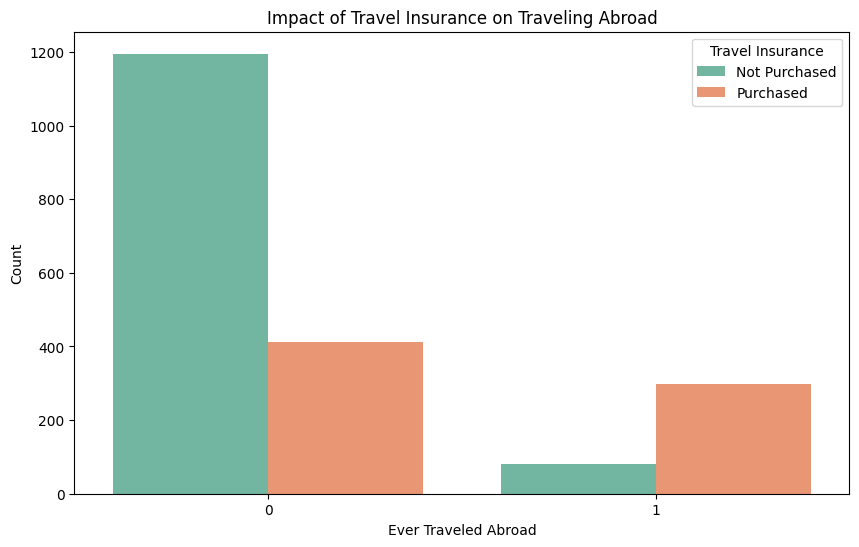


Chi-Squared Test Results:
Chi-Squared Statistic: 370.5599281861554
p-value: 1.4134505859999571e-82
Reject the null hypothesis: There is an association between traveling abroad and travel insurance.


In [9]:
# Collect data
abroad_insured = df[(df['TravelInsurance'] == 1) & (df['EverTravelledAbroad'] == 1)]
abroad_uninsured = df[(df['TravelInsurance'] == 0) & (df['EverTravelledAbroad'] == 1)]
noabroad_insured = df[(df['TravelInsurance'] == 1) & (df['EverTravelledAbroad'] == 0)]
noabroad_uninsured = df[(df['TravelInsurance'] == 0) & (df['EverTravelledAbroad'] == 0)]

print(f'Number of insured individuals who have traveled abroad: {abroad_insured.shape[0]}')
print(f'Number of uninsured individuals who have traveled abroad: {abroad_uninsured.shape[0]}')
print(f'Number of insured individuals who have not traveled abroad: {noabroad_insured.shape[0]}')
print(f'Number of uninsured individuals who have not traveled abroad: {noabroad_uninsured.shape[0]}')

# Visualize the impact of travel insurance on traveling abroad
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='EverTravelledAbroad', hue='TravelInsurance', palette="Set2")
plt.title('Impact of Travel Insurance on Traveling Abroad')
plt.xlabel('Ever Traveled Abroad')
plt.ylabel('Count')
plt.legend(title='Travel Insurance', labels=['Not Purchased', 'Purchased'])
plt.show()

# Chi-Squared Test for Independence
contingency_table = pd.crosstab(df['EverTravelledAbroad'], df['TravelInsurance'])
chi2, p, _, _ = chi2_contingency(contingency_table)

print("\nChi-Squared Test Results:")
print("Chi-Squared Statistic:", chi2)
print("p-value:", p)

alpha = 0.05  # Significance level
if p < alpha:
    print("Reject the null hypothesis: There is an association between traveling abroad and travel insurance.")
else:
    print("Fail to reject the null hypothesis: There is no association between traveling abroad and travel insurance.")
